# Подключение необходимых библиотек, импорт файла с данными

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [127]:
pd.set_option('display.max_columns', None)

In [128]:
data = pd.read_csv('stud_math.csv')

# Определение функций для последующего использования

Функция для простого анализа столбца, показывающая количество значений, пропусков и гистограмму.

In [129]:
def simple_report(x):
    print('Количество значений:')
    display(pd.DataFrame(x.value_counts()))

    print('Количество пропущенных значений:', x.isna().sum())
    display(sns.countplot(x=x))

Словарь для замены yes и no на 1 и 0, соответственно

In [130]:
d = {'yes': 1, 'no': 0}

Функциия для обработки столбца absences, которая приводит данные к единому виду с четным количеством пропусков.

In [131]:
def repair_abs(a):
    if a % 2 == 1:
        a = a+1
        return a
    else:
        return a

Функция, возвращающая boxplot с распределением значения score в разбивке по значениям столбца. 

In [132]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=data.loc[data.loc[:, column].isin(
                    data.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

Функция, выявляющая статистически значимые отличия в колонке (Критерий Стьюдента)

In [133]:
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'],
                     data.loc[data.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
                <= 0.05:
            print('Найдены статистически значимые различия для колонки', column)
            break

# Предварительный обзор данных

## Первые пять строк набора данных


In [134]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


## Обзор числовых значений датасета

In [135]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Выводы: 
1. Обнаружен подозрительный столбец 'studytime,granular' содержащий в себе отрицательные значения,
2. Столбцы Fedu и absences имеют высокое максимальное значение по сравнению с 75-м перцентилем, возможно в данных столбцах есть выбросы

## Информация о количестве записей в каждом слобце датасета

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [137]:
data.isna().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

Вывод: в данных имеются пропущенные значения практически в каждом столбце

# Сумма пропущенный значений в датасете

In [138]:
data.isna().sum().sum()

565

## Визуализация пропущенных значений в датасете

<AxesSubplot:>

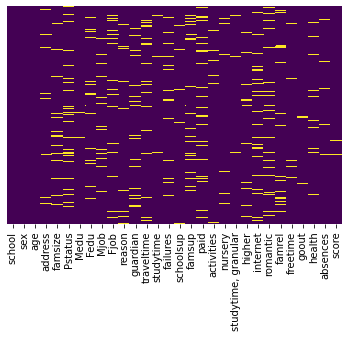

In [139]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')

Что будет если удалить все пропуски?

In [140]:
print('Длина датасета при удалении всех пропусков:', len(data.dropna()))

Длина датасета при удалении всех пропусков: 97


Выводы: 
1. В представленном наборе данных имеется много пропущенных значений практически в каждом столбце
2. Удалить все строки с пропусками - плохая идея, так как теряется 3/4 датасета.

# Столбец score
0 до 100

Количество значений:


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


Количество пропущенных значений: 6


<AxesSubplot:xlabel='score', ylabel='count'>

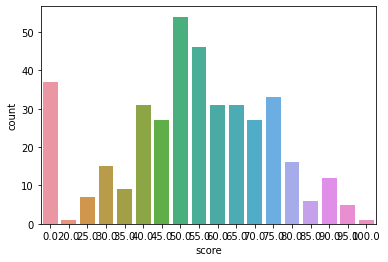

In [141]:
simple_report(data.score)

In [142]:
# Так как score искомая оценка, можно смело удалять пропущенные значения
data.dropna(inplace=True, subset=['score'])

Нулевые значения - судя по всему, неявки на экзамен, поэтому тоже подлежат удалению (если цель не спрогнозировать неявку на экзамен ученика)

In [143]:
data = data[data.score > 0]

<AxesSubplot:>

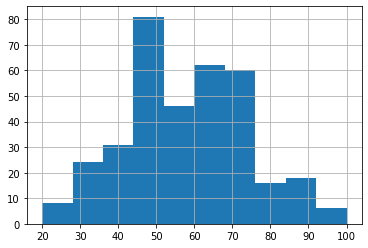

In [144]:
data.score.hist()

# Длина датасета после обработки столбца score

In [145]:
print('Длина датасета', len(data))
print('Длина датасета при удалении всех пропусков:', len(data.dropna()))

Длина датасета 352
Длина датасета при удалении всех пропусков: 90


# Столбец school (школа, в которой учится ученик)

Количество значений:


,school
GP,311
MS,41


Количество пропущенных значений: 0


<AxesSubplot:xlabel='school', ylabel='count'>

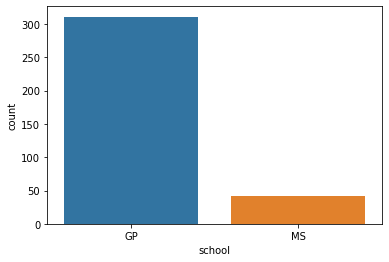

In [146]:
simple_report(data.school)

Дополнительный pie-chart для наглядности

<AxesSubplot:ylabel='school'>

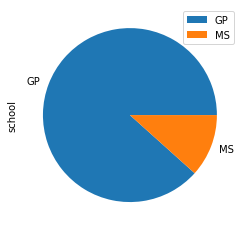

In [147]:
data.school.value_counts().plot(kind='pie', legend=1)

Выводы:
1. Большая часть учеников учится в школе GP
2. Для модели нужно будет переделать переменную в dummy

# Столбец sex (пол ученика) 
('F' - женский, 'M' - мужской)

Количество значений:


,sex
F,182
M,170


Количество пропущенных значений: 0


<AxesSubplot:xlabel='sex', ylabel='count'>

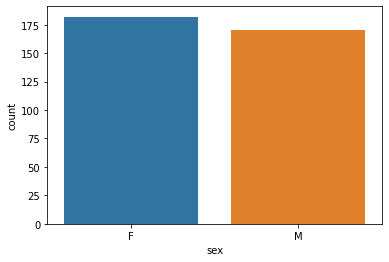

In [149]:
simple_report(data.sex)

Дополнительный pie-chart для наглядности

<AxesSubplot:ylabel='sex'>

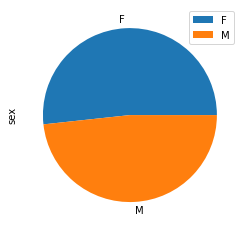

In [150]:
data['sex'].value_counts().plot(kind='pie', legend=1)

Вывод: 
1. Количество мальчиков и девочек среди учеников почти одинаковое, девочек - чуть больше.
2. Нужно переделать в переменную в dummy

## Столбец age (возраст) 
от 18 до 22 лет

Количество значений:


,age
16,96
17,90
15,76
18,69
19,16
20,3
22,1
21,1


Количество пропущенных значений: 0


<AxesSubplot:xlabel='age', ylabel='count'>

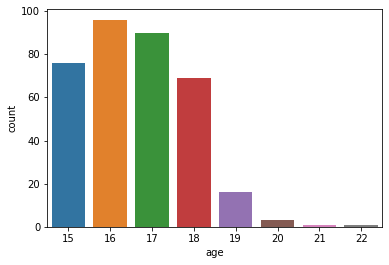

In [152]:
simple_report(data.age)

Вывод:
1. Подавляющее количество учеников распределено в диапазоне 15-19 лет
2. Есть ученики старше, 20-22 года.Такое может быть, поэтому данные можно оставить не удаляя выбросы

## Столбец address
'U' - ученик проживает в городе, 'R' - ученик проживает за городом

Количество значений:


,address
U,265
R,73


Количество пропущенных значений: 14


<AxesSubplot:xlabel='address', ylabel='count'>

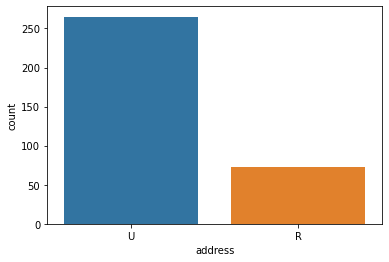

In [154]:
simple_report(data.address)

# Сравнение стобцов address и traveltime

In [155]:
data.pivot_table(index='address', columns='traveltime',
                 values='score', aggfunc='count')

traveltime,1.0,2.0,3.0,4.0
address,,,,
R,32,22,10,4
U,181,59,7,3


# Замена пропущенных значений

In [156]:
data.address.fillna('U', inplace=True)

Выводы:
1. Примерно 3/4 часть учеников проживает в городе
2. В данных есть пропущенные значения
3. Нет прямой зависимости между местом проживания и временем пути до школы
4. Пропущенные значения заменены модой - U (проживание в городе)

# Столбец famsize (размер семьи)
'LE3' - меньше или из 3 человек, 'GT3' - больше 3 человек

Количество значений:


,famsize
GT3,228
LE3,100


Количество пропущенных значений: 24


<AxesSubplot:xlabel='famsize', ylabel='count'>

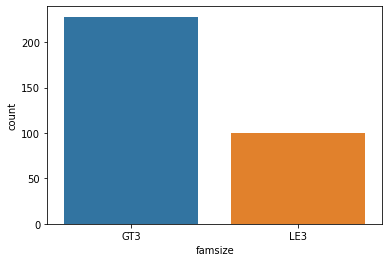

In [157]:
simple_report(data.famsize)

# Сравнение столбцов famsize и Pstatus

In [158]:
data.pivot_table(index='famsize', columns='Pstatus',
                 values='score', aggfunc='count')

Pstatus,A,T
famsize,,
GT3,18,185
LE3,13,75


# Замена пропущенных значений

In [159]:
data.famsize.fillna('GT3', inplace=True)

Выводы:
1. Большая часть часть учеников проживает в семье больше чем 3 человека
2. В данных есть пропущенные значения
3. Нет достаточной зависимости (безусловно есть зависимость, что раздельноживущие - чаще LE3), позволяющий заменить пропуски опираясь на столбец Pstatus
4. Пропущенные значения заменены на моду - GT3

# Столбец Pstatus (статус совместного проживания родителей)
'T' - Живут вместе, 'A' - Раздельно

Количество значений:


,Pstatus
T,277
A,34


Количество пропущенных значений: 41


<AxesSubplot:xlabel='Pstatus', ylabel='count'>

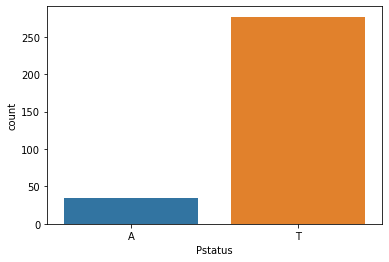

In [160]:
simple_report(data.Pstatus)

# Замена пропущенных значений

In [161]:
data.Pstatus.fillna('T', inplace=True)

Выводы:
1. Большая часть часть учеников проживает в семье, где родители проживают совместно
2. В данных есть пропущенные значения
3. Пропущенные значения заменены на моду - T

# Столбец Medu (образование матери)
0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее

Количество значений:


,Medu
4.0,125
2.0,88
3.0,87
1.0,47
0.0,3


Количество пропущенных значений: 2


<AxesSubplot:xlabel='Medu', ylabel='count'>

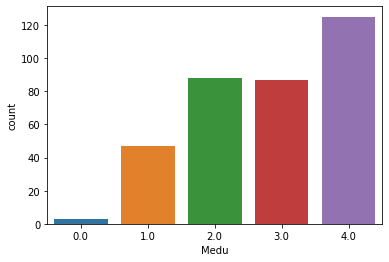

In [162]:
simple_report(data.Medu)

In [163]:
data.dropna(inplace=True, subset=['Medu'])

Выводы:
1. Большая часть матерей имеет высшее образование
2. В данных практически нет матерей, совсем не имеющих образования (всего 3)
3. Проще всего удалить пропуски

# Столбец Fedu (образование отца)
0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее

Количество значений:


,Fedu
2.0,94
3.0,88
4.0,80
1.0,64
0.0,2
40.0,1


Количество пропущенных значений: 21


<AxesSubplot:xlabel='Fedu', ylabel='count'>

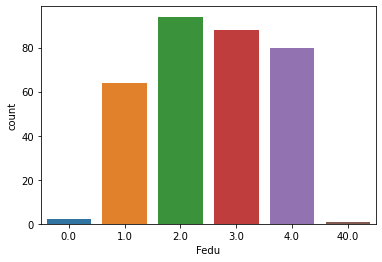

In [164]:
simple_report(data.Fedu)

# Удаление пропущенных значений и исправление ошибки

In [165]:
data.dropna(inplace=True, subset=['Fedu'])

In [166]:
data.Fedu.replace(40, 4, inplace=True)

Выводы:
1. Большая часть отцов имеет образование 5-9 классов, однако преимущество выражено не сильно.
2. В данных практически нет отцов, совсем не имеющих образования (всего 3)
3. Пропущенных значений 24
4. Имеется выброс со значением 40, можно предположить, что это техническая ошибка и должно быть значение 4
5. Ярко выраженной моды нет, проще всего удалить пропущенные значения

# Стобец Mjob (профессия матери)
'teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое

Количество значений:


,Mjob
other,107
services,84
at_home,48
teacher,44
health,29


Количество пропущенных значений: 17


<AxesSubplot:xlabel='Mjob', ylabel='count'>

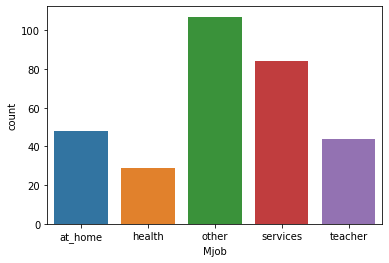

In [167]:
simple_report(data.Mjob)

# Удаление пропущенных значений

In [168]:
data.dropna(inplace=True, subset=['Mjob'])

Выводы:
1. Большая часть матерей работает в области "другое"
2. Ярко выраженной моды нет, проще всего удалить пропущенные значения

# Стобец Fjob (профессия отца)
'teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое

Количество значений:


,Fjob
other,188
services,78
teacher,22
health,13
at_home,11


Количество пропущенных значений: 0


<AxesSubplot:xlabel='Fjob', ylabel='count'>

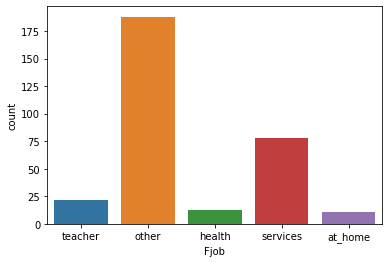

In [171]:
simple_report(data.Fjob)

In [172]:
data.Fjob.fillna('other', inplace=True)

Выводы:
1. Большая часть отцов работает в области "другое" и "государственной службы"
2. Замена пропущенных значений на моду - other

# Столбец reason (причина выбора школы)
'home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое

Количество значений:


,reason
course,106
reputation,84
home,77
other,30


Количество пропущенных значений: 15


<AxesSubplot:xlabel='reason', ylabel='count'>

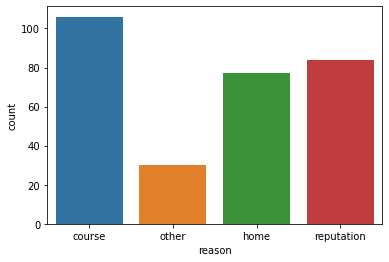

In [173]:
simple_report(data.reason)

In [174]:
data.dropna(inplace=True, subset=['reason'])

Выводы:
1. Выбор школы чаще всего обусловлен образовательной программой
2. Ярко выраженно моды нет - пропущенные значения удалены

# Столбец guardian (опекун)
'mother' - мать, 'father' - отец, 'other' - другое

Количество значений:


,guardian
mother,188
father,63
other,20


Количество пропущенных значений: 26


<AxesSubplot:xlabel='guardian', ylabel='count'>

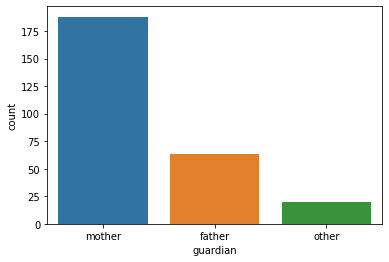

In [175]:
simple_report(data.guardian)

In [176]:
data.guardian.fillna('mother', inplace=True)

Выводы:
1. Вероятно, этот столбец отражает не сколько опекунство, сколько контактное лицо, которое заполняло документы при поступлении в школу.
2. Скорее всего, данный стобец - бессмысленный
3. Пропущенные значения заменены на моду - mother

# Столбец traveltime (время в пути до школы)
(1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

Количество значений:


,traveltime
1.0,178
2.0,77
3.0,17
4.0,7


Количество пропущенных значений: 18


<AxesSubplot:xlabel='traveltime', ylabel='count'>

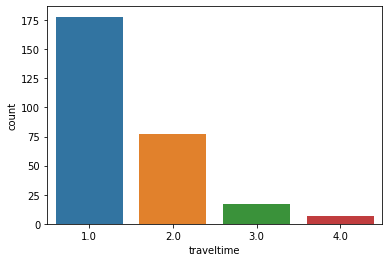

In [177]:
simple_report(data.traveltime)

# Замена пропущенных значений

In [178]:
data.traveltime.fillna(1, inplace=True)

Выводы:
1. Большая часть учеников добирается до школы меньше 15 минут.
2. Пропущенные значения заменены на моду - 1

# Столбец studytime
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

Количество значений:


,studytime
2.0,145
1.0,77
3.0,47
4.0,22


Количество пропущенных значений: 6


<AxesSubplot:xlabel='studytime', ylabel='count'>

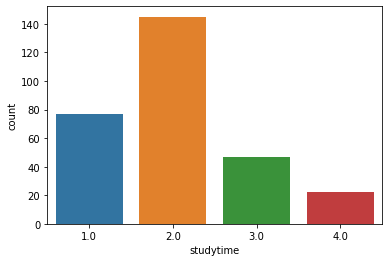

In [179]:
simple_report(data.studytime)

# Замена пропущенных значений

In [180]:
data.studytime.fillna(2, inplace=True)

Выводы:
1. Большая часть учеников занимается 2-5 часов в неделю.
2. Пропущенные значения заменены на моду - 2

# Столбец failures (количество внеучебных неудач) 
n, если 1<=n<=3, иначе 0

Количество значений:


,failures
0.0,229
1.0,32
2.0,10
3.0,10


Количество пропущенных значений: 16


<AxesSubplot:xlabel='failures', ylabel='count'>

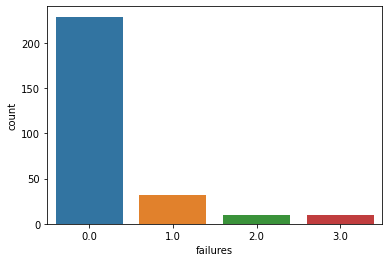

In [181]:
simple_report(data.failures)

In [182]:
data.failures.fillna(0, inplace=True)

Выводы:
1. У большинства учеников нет внеучебных неудач (или они их умалчивают)
2. Пропущенные значения заменены на моду - 0, отсутствие неудач

# Столбец schoolsup (дополнительная образовательная поддержка) 
yes или no    

Количество значений:


,schoolsup
no,248
yes,41


Количество пропущенных значений: 8


<AxesSubplot:xlabel='schoolsup', ylabel='count'>

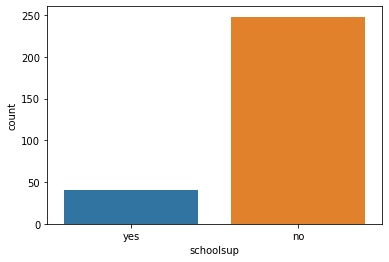

In [183]:
simple_report(data.schoolsup)

# Замена пропущенных значений

In [184]:
data.schoolsup.fillna('no', inplace=True)

# Замена yes-no на значения 1-yes (True) 0-no (False)

In [185]:
data.schoolsup.replace(d, inplace=True)

Вывод:
    1. Большая часть учеников не имеют дополнительной образовательной поддержки
    2. Пропущенных значения заменены на моду - no
    3. Строковые данные заменены на int 1 и 0

# Столбец famsup (семейная образовательная поддержка)
yes или no

Количество значений:


,famsup
yes,169
no,101


Количество пропущенных значений: 27


<AxesSubplot:xlabel='famsup', ylabel='count'>

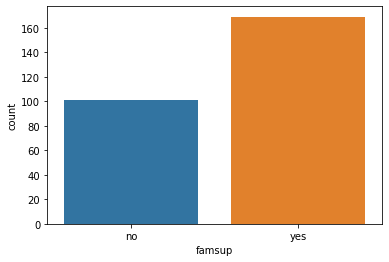

In [186]:
simple_report(data.famsup)

In [187]:
data.famsup.fillna('yes', inplace=True)

In [188]:
data.famsup.replace(d, inplace=True)

Вывод: 
1. Большая часть семей получает дополнительную образовательную поддержку
2. Пропущенные значения заменены на моду - yes

# Столбец paid (дополнительные платные занятия по математике)
(yes или no)

Количество значений:


,paid
no,144
yes,122


Количество пропущенных значений: 31


<AxesSubplot:xlabel='paid', ylabel='count'>

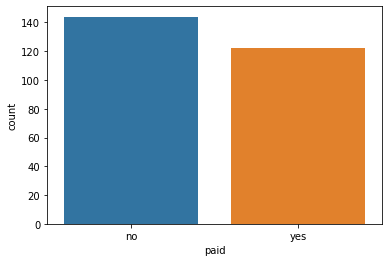

In [189]:
simple_report(data.paid)

In [190]:
data.paid = data.paid.replace(d)

Проверка корреляции значения paid и score

In [191]:
data[['paid', 'score']].corr()

,paid,score
paid,1.000000,-0.020602
score,-0.020602,1.000000


Удаление столбца paid

In [192]:
data.drop(axis=1, columns='paid', inplace=True)

Вывод: 
1. Большая часть учеников не берет дополнительные платные занятия по математике
2. Количество пропущенных значений велико, корреляция между целевым признаком очень низкая - лучше всего удалить столбец чтобы не потерять данные

# Столбец activities (дополнительные внеучебные занятия) 
yes или no

Количество значений:


,activities
no,146
yes,140


Количество пропущенных значений: 11


<AxesSubplot:xlabel='activities', ylabel='count'>

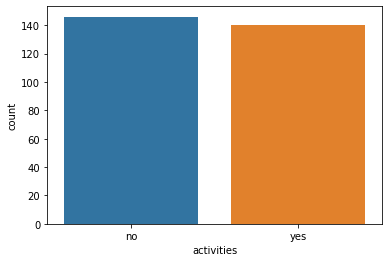

In [193]:
simple_report(data.activities)

In [194]:
data.activities.replace(d, inplace=True)

Проверка значений корреляции стобцов activities и score

In [195]:
data[['activities', 'score']].corr()

,activities,score
activities,1.000000,0.107335
score,0.107335,1.000000


Удаление пропущенных значений в столбце activities

In [196]:
data.dropna(inplace=True, subset=['activities'])

Выводы:
1. Количество учеников, посещающие дополнительные внеурочные занятия приблизительно поровну
2. Корреляция между activities и score больше 0.1, пропущенные значения удалены.

# Столбец nursery посещал детский сад 
yes или no

Количество значений:


,nursery
yes,216
no,60


Количество пропущенных значений: 10


<AxesSubplot:xlabel='nursery', ylabel='count'>

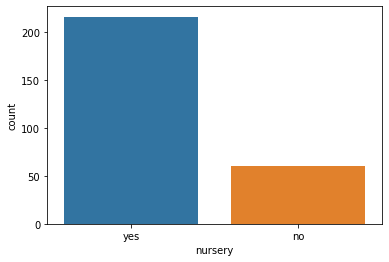

In [197]:
simple_report(data.nursery)

In [198]:
data.nursery.fillna('yes', inplace=True)

In [199]:
data.nursery.replace(d, inplace=True)

Вывод: 
1. Большая часть детей посещала детский сад
2. Пропущенные значения заменены на True

# Столбец studytime, granular
??

Количество значений:


,"studytime, granular"
-6.0,140
-3.0,73
-9.0,45
-12.0,22


Количество пропущенных значений: 6


<AxesSubplot:xlabel='studytime, granular', ylabel='count'>

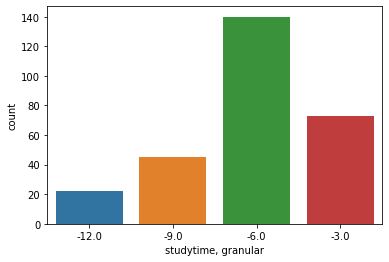

In [200]:
simple_report(data['studytime, granular'])

In [201]:
display(data[['studytime', 'studytime, granular']])
display(data[['studytime', 'studytime, granular']].corr())

,studytime,"studytime, granular"
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
386,1.0,-3.0
388,2.0,-6.0
390,2.0,-6.0
391,1.0,-3.0


,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


In [202]:
data.drop(axis=1, columns='studytime, granular', inplace=True)

Выводы:
1. Столбец studytime, granular полностью коррелирует со столбцом studytime и является числовой интерпретацией категорий из столбца studytime.
2. У вышеуказанных столбцов одинаковое количество пропусков
3. Столбец удален (возможно, удалить именно этот столбец - не оптимальное решение)

# Столбец higher (хочет получить высшее образование
yes или no

Количество значений:


,higher
yes,259
no,11


Количество пропущенных значений: 16


<AxesSubplot:xlabel='higher', ylabel='count'>

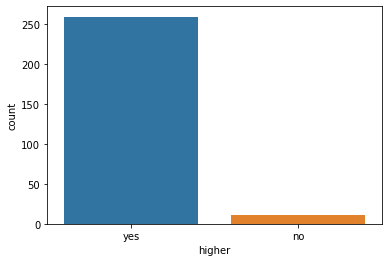

In [203]:
simple_report(data.higher)

Замена пропущенных значений

In [204]:
data.higher.fillna('yes', inplace=True)

In [205]:
data.higher.replace(d, inplace=True)

Выводы:
1. Большая часть учеников планирует получать высшее образование 
2. Пропущенные значение заменены на моду - True

# Столбец internet (наличие интернета дома)
yes или no

Количество значений:


,internet
yes,217
no,42


Количество пропущенных значений: 27


<AxesSubplot:xlabel='internet', ylabel='count'>

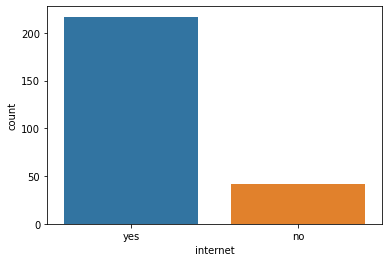

In [206]:
simple_report(data.internet)

Замена пропущенных значений

In [207]:
data.internet.fillna('yes', inplace=True)

In [208]:
data.internet.replace(d, inplace=True)

Выводы:
1. Большая часть учеников имеет дома доступ к интернету
2. Пропущенные значения заменены на yes

# Столбец romantic (в романтических отношениях)
yes или no


Количество значений:


,romantic
no,174
yes,89


Количество пропущенных значений: 23


<AxesSubplot:xlabel='romantic', ylabel='count'>

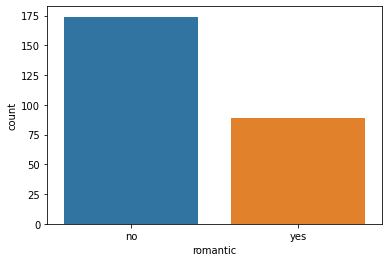

In [209]:
simple_report(data.romantic)

Замена пропущенных значений 

In [210]:
data.romantic.fillna('no', inplace=True)

In [211]:
data.romantic.replace(d, inplace=True)

Выводы:
1. Большая часть учеников не состоит в романтических отношениях
2. Пропущенные значения заменены на no

# Столбец famrel (семейные отношения)
от 1 - очень плохо до 5 - очень хорошо

Количество значений:


,famrel
4.0,133
5.0,74
3.0,45
2.0,10
1.0,5
-1.0,1


Количество пропущенных значений: 18


<AxesSubplot:xlabel='famrel', ylabel='count'>

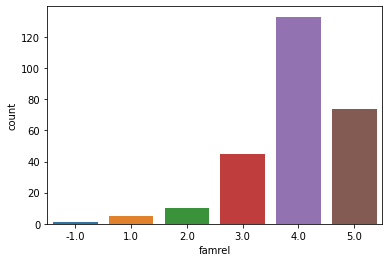

In [212]:
simple_report(data.famrel)

In [213]:
data.famrel.fillna(4, inplace=True)

In [214]:
data.famrel.replace(-1, 1, inplace=True)

Выводы:
1. Большая часть семей имеют хорошие отношения в семье.
2. В данных есть ошибка со значением - -1, заменена на 1
3. Пропущенные значения заменены на моду - 4

# Столбец freetime (свободное время после школы) 
от 1 - очень мало до 5 - очень мого

Количество значений:


,freetime
3.0,105
4.0,82
2.0,49
5.0,31
1.0,14


Количество пропущенных значений: 5


<AxesSubplot:xlabel='freetime', ylabel='count'>

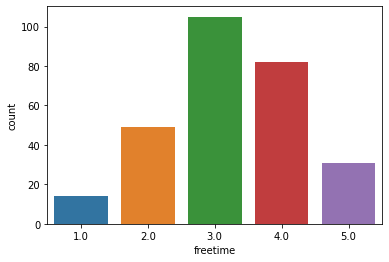

In [215]:
simple_report(data.freetime)

In [216]:
data.freetime.fillna(3, inplace=True)

Выводы:
1. Большая часть учеников имеет среднее количество свободного времени
2. Распределение свобдного врмени учеников близко к нормальному
3. Пропуски заменены на моду - 3

# Столбец goout (проведение времени с друзьями)
от 1 - очень мало до 5 - очень много

Количество значений:


,goout
3.0,101
2.0,72
4.0,60
5.0,31
1.0,17


Количество пропущенных значений: 5


<AxesSubplot:xlabel='goout', ylabel='count'>

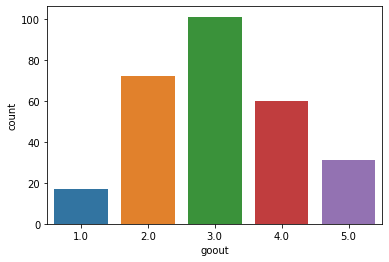

In [217]:
simple_report(data.goout)

Замена пропущенных значений

In [90]:
data.goout.fillna(3, inplace=True)

Выводы:
1. Большая часть учеников проводит среднее количество времени с друзьями
2. Распределение  врмени проведенного с друзьями у учеников близко к нормальному
3. Пропущенные значения заменены на моду - 3

# Столбец health (текущее состояние здоровья)
от 1 - очень плохо до 5 - очень хорошо   

Количество значений:


,health
5.0,98
3.0,70
4.0,44
1.0,36
2.0,28


Количество пропущенных значений: 10


<AxesSubplot:xlabel='health', ylabel='count'>

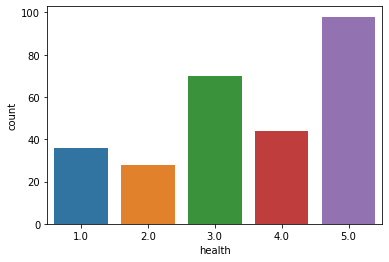

In [218]:
simple_report(data.health)

Замена пропущенных значений

In [219]:
data.health.fillna(5, inplace=True)

Выводы:
1. У большей части учеников очень хорошее здоровье
2. Пропущенные значения заменены на моду 5

# Столбец absences (количество пропущенных занятий)

Количество значений:


,absences
0.0,58
2.0,50
4.0,40
6.0,26
8.0,17
10.0,13
14.0,9
12.0,9
3.0,7
7.0,5


Количество пропущенных значений: 9


<AxesSubplot:xlabel='absences', ylabel='count'>

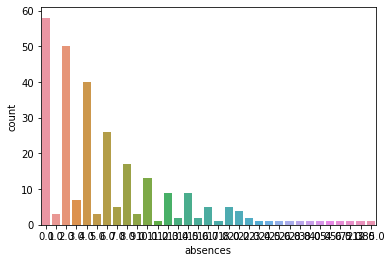

In [220]:
simple_report(data.absences)

Удаление пропущенных значений

In [221]:
data.dropna(inplace=True, subset=['absences'])

Пропуски занятий чаще всего кратны 2, к данным применена функция +1 к нечетным числам, чтобы привести данные к более адекватному распределению.

In [222]:
data.absences = data.absences.apply(repair_abs)

Количество значений:


,absences
0.0,58
2.0,53
4.0,47
6.0,29
8.0,22
10.0,16
14.0,11
12.0,10
16.0,7
18.0,6


Количество пропущенных значений: 0


<AxesSubplot:xlabel='absences', ylabel='count'>

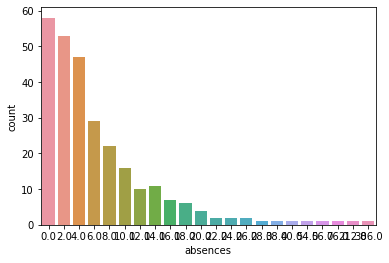

In [223]:
simple_report(data.absences)

Определение границ выбросов

In [224]:
IQR = data.absences.quantile(0.75) - data.absences.quantile(0.25)
perc25 = data.absences.quantile(0.25)
perc75 = data.absences.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0,  Границы выбросов: [-7.0, 17.0].


Исключение из данных выбросов

In [225]:
data = data.loc[data.absences <= 17]

# Корреляция между числовыми признакми

In [226]:
data.corr()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
age,1.000000,-0.148916,-0.139825,0.066552,0.009936,0.240972,-0.229651,-0.139417,-0.122436,-0.103999,-0.208158,-0.154560,0.174435,0.084131,0.020152,0.140764,-0.049081,0.201239,-0.166673
Medu,-0.148916,1.000000,0.610361,-0.202385,0.055135,-0.221249,-0.028222,0.158044,0.109496,0.191116,0.195528,0.252764,0.052087,-0.032135,0.021149,0.016170,-0.081079,0.100625,0.175632
Fedu,-0.139825,0.610361,1.000000,-0.146564,-0.048237,-0.303341,0.084157,0.212511,0.066215,0.175042,0.207253,0.162748,0.027195,-0.050543,-0.002973,-0.029834,0.008994,-0.011079,0.104325
traveltime,0.066552,-0.202385,-0.146564,1.000000,-0.091751,0.052773,0.037884,0.003984,0.025230,-0.015635,-0.135052,-0.084633,0.078990,-0.035294,-0.013671,0.051892,0.006316,-0.059590,-0.084178
studytime,0.009936,0.055135,-0.048237,-0.091751,1.000000,-0.155393,-0.045468,0.110138,0.120996,0.110764,0.144630,0.086748,0.063005,0.027534,-0.137639,-0.043252,-0.111256,-0.036665,0.169689
failures,0.240972,-0.221249,-0.303341,0.052773,-0.155393,1.000000,0.073252,-0.048169,-0.049834,-0.146513,-0.418690,-0.117650,0.055096,0.014820,0.120938,0.102336,0.084754,0.186876,-0.309125
schoolsup,-0.229651,-0.028222,0.084157,0.037884,-0.045468,0.073252,1.000000,0.088171,0.069012,0.005023,-0.003590,-0.008610,0.002857,0.022075,-0.074644,-0.020947,-0.056869,0.019335,-0.241159
famsup,-0.139417,0.158044,0.212511,0.003984,0.110138,-0.048169,0.088171,1.000000,-0.024537,-0.001786,0.057735,0.070218,0.019752,0.002454,0.032064,-0.044981,0.018791,-0.000166,-0.068993
activities,-0.122436,0.109496,0.066215,0.025230,0.120996,-0.049834,0.069012,-0.024537,1.000000,0.045160,-0.043036,0.070146,0.000958,0.103322,0.076129,0.025732,0.026467,0.032547,0.098542
nursery,-0.103999,0.191116,0.175042,-0.015635,0.110764,-0.146513,0.005023,-0.001786,0.045160,1.000000,0.187577,0.074496,0.030307,0.032956,-0.055356,-0.046071,-0.026790,0.005801,0.037803


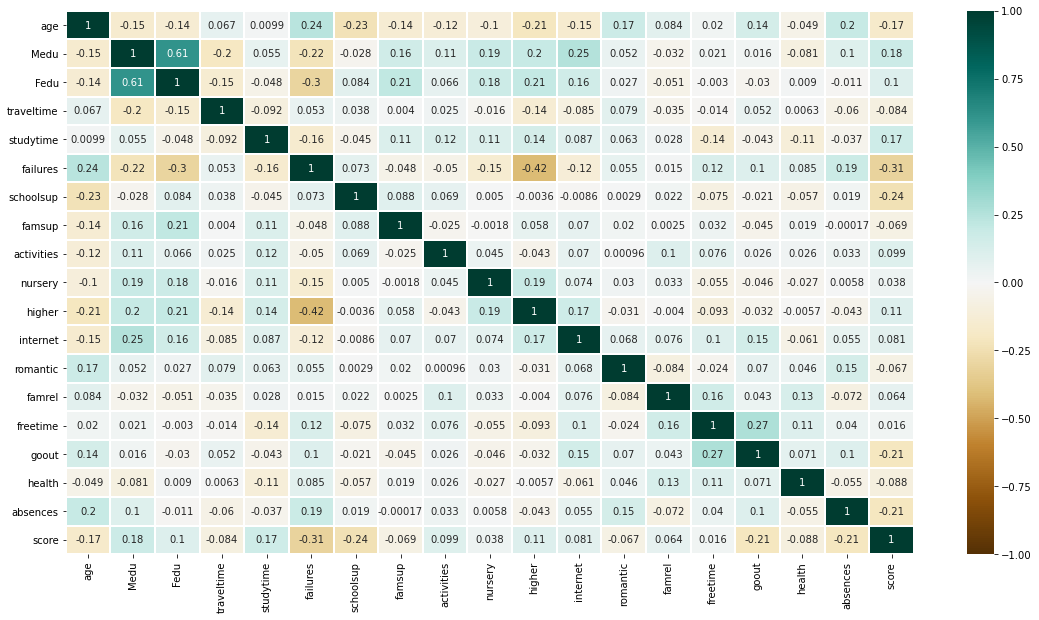

In [232]:
plt.figure(figsize=(19, 10))

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1,
                      annot=True, cmap='BrBG', linewidths=1)

In [101]:
category_cols = [var for var in data.columns if data[var].dtypes == 'O']

In [102]:
category_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian']

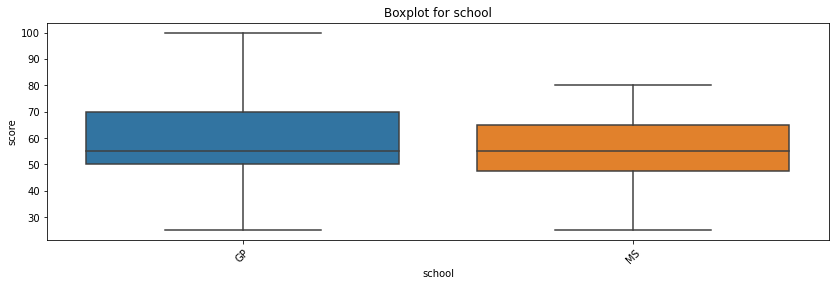

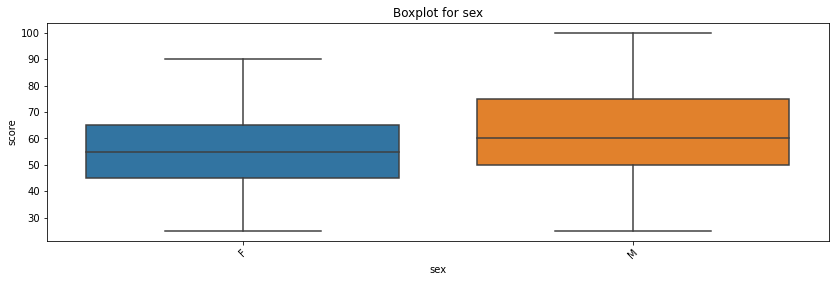

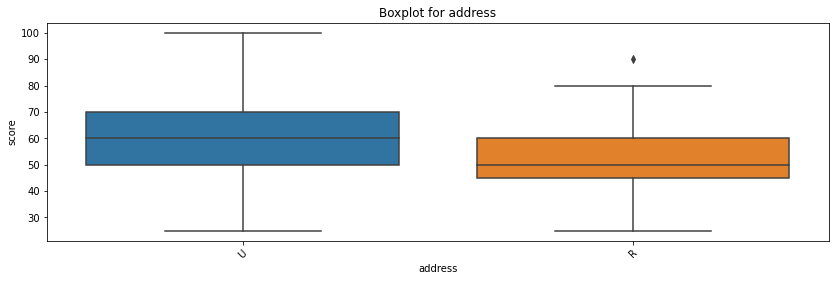

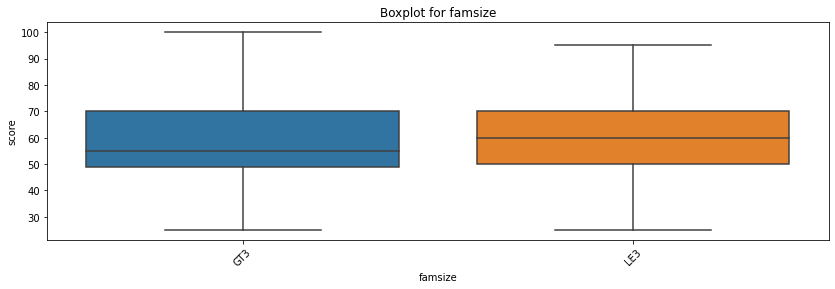

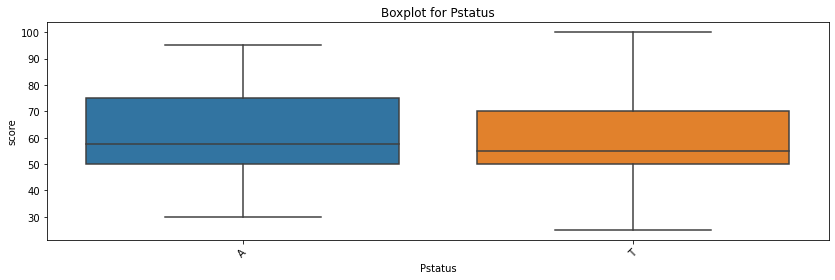

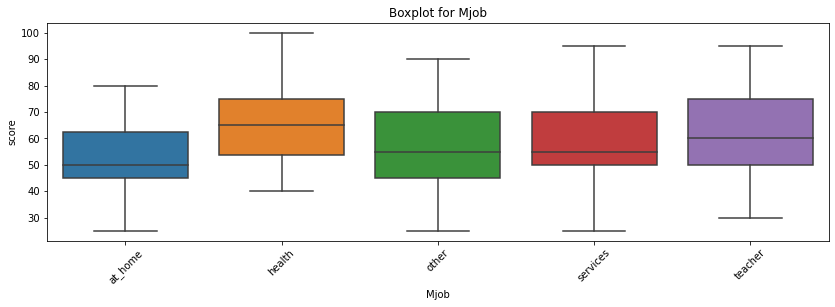

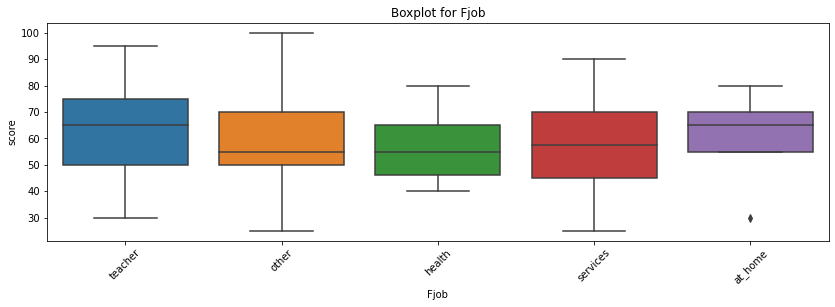

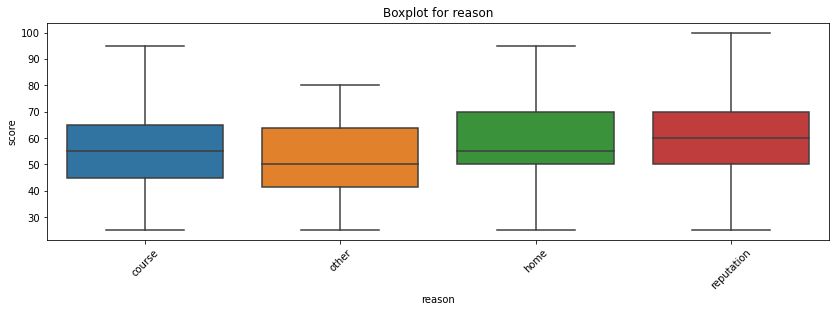

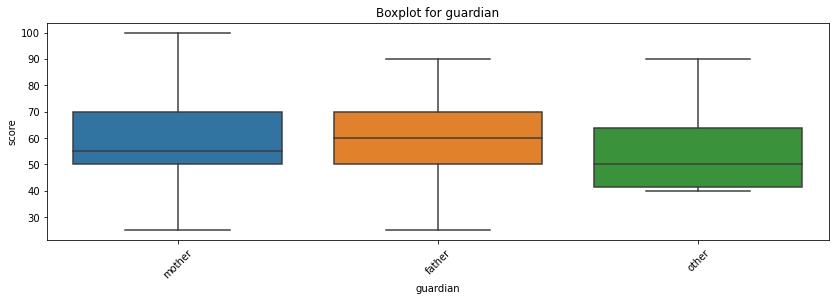

In [103]:
for col in category_cols:
    get_boxplot(col)

# Статистически значимые различия для колонок с номинативными переменными (T-тест)

In [104]:
for col in category_cols:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки reason


Вывод:
1. 4 колонки: sex, address, Mjob, reason оказывают статистически значимое влияние на score.

# Проверка ликвидированы ли все пропуски

In [105]:
data.isna().sum().sum()

0

# Итоговая длина датасета

In [233]:
len(data)

253

In [106]:
data.reset_index(drop=True, inplace=True)

# Создание из колонок с номинативными переменными - столбцы dummy и готовый для модели датасет

In [107]:
data_for_model = pd.get_dummies(data=data, columns=category_cols)

In [108]:
display(data_for_model)

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4.0,4.0,2.0,2.0,0.0,1,0,0.0,1,1,1,0,4.0,3.0,4.0,3.0,6.0,30.0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,17,1.0,1.0,1.0,2.0,0.0,0,1,0.0,0,1,1,0,5.0,3.0,3.0,3.0,4.0,30.0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,15,1.0,1.0,1.0,2.0,3.0,1,0,0.0,1,1,1,0,4.0,3.0,2.0,3.0,10.0,50.0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,15,4.0,2.0,1.0,3.0,0.0,0,1,1.0,1,1,1,1,3.0,2.0,2.0,5.0,2.0,75.0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,16,3.0,3.0,1.0,2.0,0.0,0,1,0.0,1,1,0,0,4.0,3.0,2.0,5.0,4.0,50.0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,18,2.0,2.0,1.0,3.0,0.0,0,0,0.0,1,1,1,0,5.0,3.0,3.0,4.0,2.0,50.0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
249,18,4.0,4.0,3.0,1.0,0.0,0,1,1.0,1,1,1,1,4.0,4.0,3.0,5.0,8.0,30.0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
250,18,3.0,1.0,1.0,2.0,0.0,0,1,0.0,1,1,1,0,4.0,3.0,4.0,1.0,0.0,40.0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
251,17,3.0,1.0,2.0,1.0,0.0,0,0,0.0,0,1,1,0,2.0,4.0,5.0,2.0,4.0,80.0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


# Выводы

1. Итоговый датасет для моделерования содержит много переменных, которые по разному коррелируют с целевой переменной score (иногда не очень сильно) 
2. Принятое решение оставить как можно больше столбцов может отрицательно сказаться на результатах модели
3. Приблизительно 1/3 строк исходного датасета - удалена
4. Данные готовы для применения в модели